<a href="https://colab.research.google.com/github/Sanjay05-coder/Student-Exam-Grade-Prediction-Project-/blob/main/Student_Exam_Grade_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Library

In [40]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,precision_score, recall_score, f1_score


#Reading the csv file from the google form

In [41]:
df=pd.read_csv('/content/Student excel (1)_final _data.csv')

#Data Preprocessing

In [42]:
df

,Timestamp,Course or Major,Average Study Hours per Week,Attendance Percentage,MidTerm Quiz Score,Revision Frequency,Participation in Class,Average Sleep Hours per Night,Internet Usage Hours (per day),Final Result Grade
0,10/25/2025 23:09:02,Diploma in Robotics and Automation,14,100,85.5,2-3 times,High,6.0,5,A
1,10/25/2025 23:14:28,Computer science,12,88,70.0,2-3 times,Medium,6.0,6,C
2,10/25/2025 23:15:00,Bachelor of Computer Science,10,80,60.0,2-3 times,Medium,6.0,7,B
3,10/25/2025 23:16:45,Computer science,3,100,70.0,2-3 times,Medium,5.0,8,A
4,10/25/2025 23:21:57,Computer science major in AI,1,96,85.0,Only before exams,High,5.0,12,A
5,10/25/2025 23:28:00,Cybersecurity,24,100,80.0,Daily,High,6.0,10,A
6,10/25/2025 23:30:14,Bachelor of Business,9,100,75.0,Daily,Medium,7.0,7,A
7,10/25/2025 23:35:58,Course,21,99,80.0,2-3 times,High,6.0,13,B
8,10/25/2025 23:39:58,Business Administration,8,90,90.0,2-3 times,High,7.0,20,B
9,10/26/2025 0:05:07,LLB(honours),14,85,75.0,Daily,High,6.0,16,B


In [43]:
df.drop(['Course or Major', 'Timestamp'], axis=1, inplace=True,errors='ignore') # dropping the course and timestap column as it is irrelevant to our prediction/project

In [44]:
df

,Average Study Hours per Week,Attendance Percentage,MidTerm Quiz Score,Revision Frequency,Participation in Class,Average Sleep Hours per Night,Internet Usage Hours (per day),Final Result Grade
0,14,100,85.5,2-3 times,High,6.0,5,A
1,12,88,70.0,2-3 times,Medium,6.0,6,C
2,10,80,60.0,2-3 times,Medium,6.0,7,B
3,3,100,70.0,2-3 times,Medium,5.0,8,A
4,1,96,85.0,Only before exams,High,5.0,12,A
5,24,100,80.0,Daily,High,6.0,10,A
6,9,100,75.0,Daily,Medium,7.0,7,A
7,21,99,80.0,2-3 times,High,6.0,13,B
8,8,90,90.0,2-3 times,High,7.0,20,B
9,14,85,75.0,Daily,High,6.0,16,B


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Average Study Hours per Week    48 non-null     int64  
 1   Attendance Percentage           48 non-null     int64  
 2   MidTerm Quiz Score              48 non-null     float64
 3   Revision Frequency              48 non-null     object 
 4   Participation in Class          48 non-null     object 
 5   Average Sleep Hours per Night   48 non-null     float64
 6   Internet Usage Hours (per day)  48 non-null     int64  
 7   Final Result Grade              48 non-null     object 
dtypes: float64(2), int64(3), object(3)
memory usage: 3.1+ KB


In [46]:
df.isnull().sum() # we could tell that there isnt any NaN Values therefore no need to fill any values or drop columns

,0
Average Study Hours per Week,0
Attendance Percentage,0
MidTerm Quiz Score,0
Revision Frequency,0
Participation in Class,0
Average Sleep Hours per Night,0
Internet Usage Hours (per day),0
Final Result Grade,0


In [47]:
df

,Average Study Hours per Week,Attendance Percentage,MidTerm Quiz Score,Revision Frequency,Participation in Class,Average Sleep Hours per Night,Internet Usage Hours (per day),Final Result Grade
0,14,100,85.5,2-3 times,High,6.0,5,A
1,12,88,70.0,2-3 times,Medium,6.0,6,C
2,10,80,60.0,2-3 times,Medium,6.0,7,B
3,3,100,70.0,2-3 times,Medium,5.0,8,A
4,1,96,85.0,Only before exams,High,5.0,12,A
5,24,100,80.0,Daily,High,6.0,10,A
6,9,100,75.0,Daily,Medium,7.0,7,A
7,21,99,80.0,2-3 times,High,6.0,13,B
8,8,90,90.0,2-3 times,High,7.0,20,B
9,14,85,75.0,Daily,High,6.0,16,B


#Label Encoding - converting to numeric values

In [48]:
label_encoder = LabelEncoder()
df['Participation in Class'] = label_encoder.fit_transform(df['Participation in Class'])
df['Revision Frequency'] = label_encoder.fit_transform(df['Revision Frequency'])

In [49]:
df['Participation in Class'] == df['Participation in Class'].map({
    'Low':0,
    'Medium':1,
    'High':2
})


,Participation in Class
0,False
1,False
2,False
3,False
4,False
5,False
6,False
7,False
8,False
9,False


In [50]:
df

,Average Study Hours per Week,Attendance Percentage,MidTerm Quiz Score,Revision Frequency,Participation in Class,Average Sleep Hours per Night,Internet Usage Hours (per day),Final Result Grade
0,14,100,85.5,0,0,6.0,5,A
1,12,88,70.0,0,2,6.0,6,C
2,10,80,60.0,0,2,6.0,7,B
3,3,100,70.0,0,2,5.0,8,A
4,1,96,85.0,5,0,5.0,12,A
5,24,100,80.0,1,0,6.0,10,A
6,9,100,75.0,1,2,7.0,7,A
7,21,99,80.0,0,0,6.0,13,B
8,8,90,90.0,0,0,7.0,20,B
9,14,85,75.0,1,0,6.0,16,B


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Average Study Hours per Week    48 non-null     int64  
 1   Attendance Percentage           48 non-null     int64  
 2   MidTerm Quiz Score              48 non-null     float64
 3   Revision Frequency              48 non-null     int64  
 4   Participation in Class          48 non-null     int64  
 5   Average Sleep Hours per Night   48 non-null     float64
 6   Internet Usage Hours (per day)  48 non-null     int64  
 7   Final Result Grade              48 non-null     object 
dtypes: float64(2), int64(5), object(1)
memory usage: 3.1+ KB


#Exploratory Data Analysis (EDA)

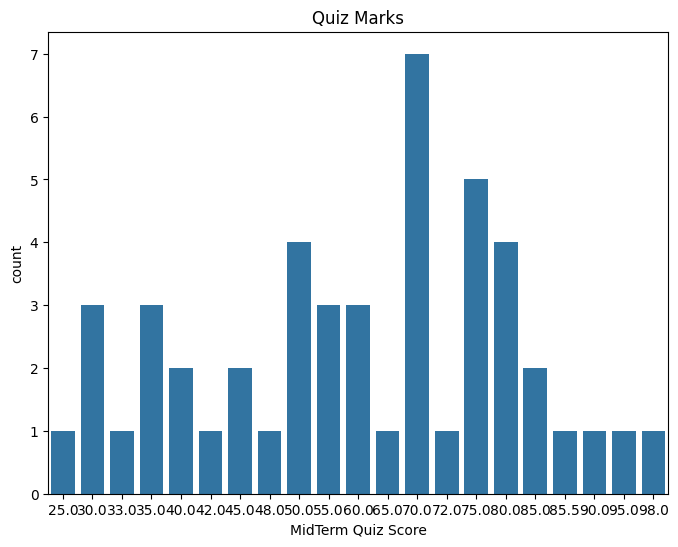

In [52]:
plt.figure(figsize=(8, 6))
sns.countplot(x='MidTerm Quiz Score', data=df)
plt.title('Quiz Marks')
plt.xlabel('MidTerm Quiz Score')
plt.ylabel('count')

plt.show()

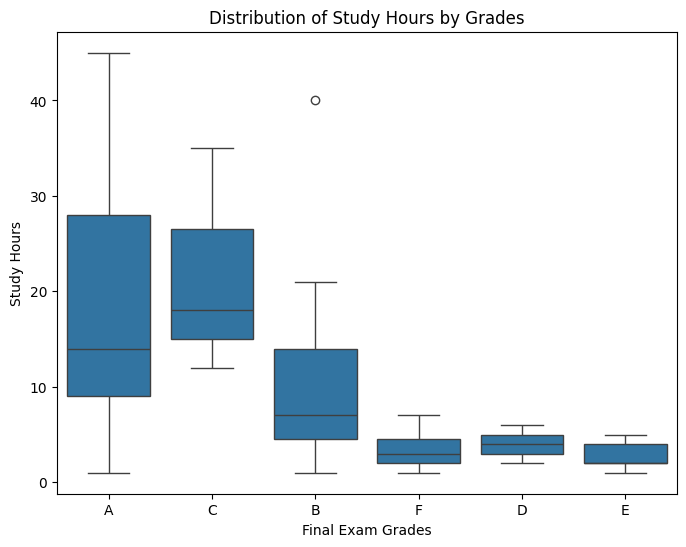

In [53]:
plt.figure(figsize=(8,6))
# Remove leading and trailing spaces from all column names
df.columns = df.columns.str.strip()
sns.boxplot(x='Final Result Grade', y='Average Study Hours per Week', data=df)
plt.title('Distribution of Study Hours by Grades')
plt.xlabel('Final Exam Grades')
plt.ylabel('Study Hours')
plt.show()

In [54]:
df['Final Result Grade'] = label_encoder.fit_transform(df['Final Result Grade']) # converting alphabets to numeric values using label encoder

In [55]:
df

,Average Study Hours per Week,Attendance Percentage,MidTerm Quiz Score,Revision Frequency,Participation in Class,Average Sleep Hours per Night,Internet Usage Hours (per day),Final Result Grade
0,14,100,85.5,0,0,6.0,5,0
1,12,88,70.0,0,2,6.0,6,2
2,10,80,60.0,0,2,6.0,7,1
3,3,100,70.0,0,2,5.0,8,0
4,1,96,85.0,5,0,5.0,12,0
5,24,100,80.0,1,0,6.0,10,0
6,9,100,75.0,1,2,7.0,7,0
7,21,99,80.0,0,0,6.0,13,1
8,8,90,90.0,0,0,7.0,20,1
9,14,85,75.0,1,0,6.0,16,1


#Plotting heatmap to see correlation

<Axes: >

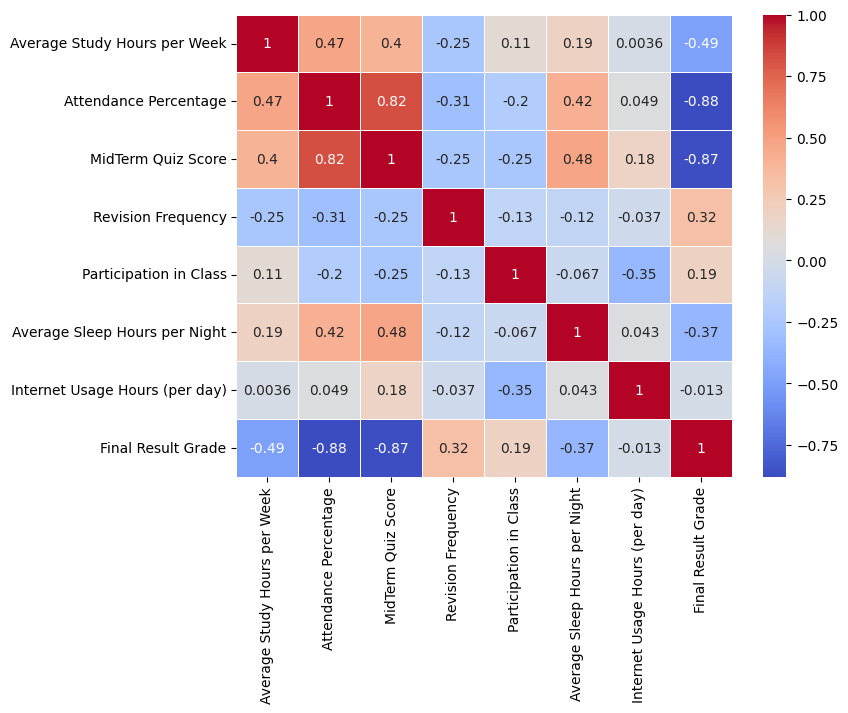

In [56]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)

# Seperating X and Y(Feature and Target)

In [57]:

X= df[['Attendance Percentage', 'Average Study Hours per Week', 'MidTerm Quiz Score']]
y = df['Final Result Grade']


In [58]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#Scaling data

In [59]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [60]:
#Saving the scaler to use in gradio later
import joblib
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

# Creating an Object from each machine learning class.

In [61]:
logistic_model=LogisticRegression()
Naivemodel = GaussianNB()
xgb_model=XGBClassifier( n_estimators=150,
    learning_rate=0.1,
    max_depth=4,
    random_state=42)
decision_tree=DecisionTreeClassifier()


#Creating XGB Classifier model Function

In [62]:
def train_and_predict_XGB_model(X_train_scaled, X_test_scaled, y_train, model):

  model.fit(X_train_scaled, y_train)

# Predictions
  y_pred = model.predict(X_test_scaled)

  return y_pred

In [63]:
y_pred_xgb = train_and_predict_XGB_model(X_train_scaled, X_test_scaled, y_train, xgb_model)
print(y_pred_xgb)

[5 3 2 5 1 3 0 1 1 1]


#Creating logistic model Function

In [64]:
def train_and_predict_logistic_model(X_train_scaled, X_test_scaled, y_train, y_test):

  logistic_model.fit(X_train_scaled, y_train)
  y_pred=logistic_model.predict(X_test_scaled)

  return y_pred

In [65]:
y_pred_logistic = train_and_predict_logistic_model(X_train_scaled, X_test_scaled, y_train, logistic_model)
print(y_pred_logistic)

[5 1 5 5 1 5 0 1 1 1]


#Creating Naive Bayers Function

In [66]:
def naiveBayers_model_train(X_train_scaled,X_test_scaled,y_train,y_test):
  Naivemodel.fit(X_train_scaled,y_train)
  y_pred=Naivemodel.predict(X_test_scaled)

  return y_pred

In [67]:
y_pred_naive = naiveBayers_model_train(X_train_scaled, X_test_scaled, y_train, Naivemodel)
print(y_pred_naive)

[5 3 1 5 1 5 0 1 0 1]


#Creating decsion Tree Function

In [68]:
def decision_tree_model_train(X_train_scaled,X_test_scaled,y_train,y_test):
  decision_tree.fit(X_train_scaled,y_train)
  y_pred=decision_tree.predict(X_test_scaled)

  return y_pred

In [69]:
y_pred_decision_tree = decision_tree_model_train(X_train_scaled, X_test_scaled, y_train, decision_tree)
print(y_pred_decision_tree)

[5 3 5 5 1 3 0 1 1 1]


# getting the report of all models-accuracy

In [70]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "XGBoost ":XGBClassifier()

}

# Store all results
results = []

# Train and evaluate
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # Calculate metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Append to results
    results.append({
        "Model": name,
        "Accuracy": round(acc, 3),
        "Precision": round(prec, 3),
        "Recall": round(rec, 3),
        "F1-Score": round(f1, 3)
    })

# Convert to DataFrame
report_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)
print(" Model Performance Comparison Table:\n")
print(report_df)

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


 Model Performance Comparison Table:

                 Model  Accuracy  Precision  Recall  F1-Score
3             XGBoost        0.8      0.775     0.8     0.757
1          Naive Bayes       0.7      0.658     0.7     0.640
2        Decision Tree       0.6      0.625     0.6     0.590
0  Logistic Regression       0.5      0.405     0.5     0.398


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#Ploting a bar chart to see which models performs best -visualizing

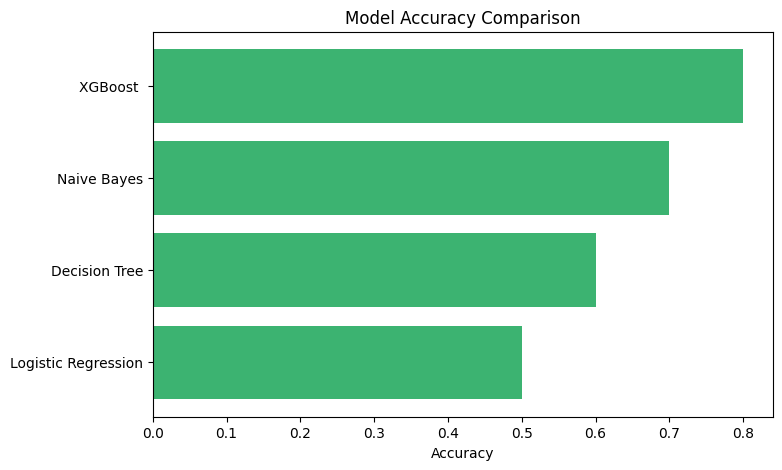

In [71]:

plt.figure(figsize=(8,5))
plt.barh(report_df['Model'], report_df['Accuracy'], color='mediumseagreen')
plt.xlabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.gca().invert_yaxis()
plt.show()

#We can see that XGBoost has better accuracy

In [72]:
best_model = report_df.loc[report_df['Accuracy'].idxmax(), 'Model']
print(f" Best performing model is: {best_model}")

 Best performing model is: XGBoost 


#Saving model best model

In [73]:
import joblib
joblib.dump(models[best_model], 'best_model.pkl')

['best_model.pkl']

#installing gradio

In [74]:
pip install gradio

In [37]:
import gradio as gr

#Defining fuction of gradio

In [38]:
# Load saved model
model = joblib.load("best_model.pkl")
scaler = joblib.load("scaler.pkl")

# Prediction function
def predict_grade(hours, attendance, midterm):
    data = [hours, attendance, midterm]
    scaled_data = scaler.transform([data])

    # Predict
    prediction = model.predict(scaled_data)[0]

    # Map numeric prediction to grade
    grade_mapping = {
        0: "A",
        1: "B",
        2: "C",
        3: "D",
        4: "E",
        5: "F"
    }
    result = grade_mapping.get(int(prediction), "Unknown")

    # Suggestions
    suggestions = []
    if hours < 10: suggestions.append("Increase study hours.")
    if attendance < 65: suggestions.append("Improve attendance.")
    if midterm < 50: suggestions.append("Get enough sleep.")
    if not suggestions:
        suggestions.append("Excellent! Keep up the great work. You will Pass")

    return result, "\n".join(suggestions)

In [39]:

demo = gr.Interface(
    fn=predict_grade,
    inputs=[
        gr.Number(label="Study Hours per Week"),
        gr.Number(label="Attendance Percentage"),
        gr.Number(label="MidTerm Quiz Score"),
    ],
    outputs=[
        gr.Textbox(label="Prediction"),
        gr.Textbox(label="Suggestion"),
    ],


    title="Student Grade Prediction ",
    description="Enter student details to predict the Grades for a subject :"

)


demo.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://6e0f5f131c14835a29.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


#Output: Pass(B)

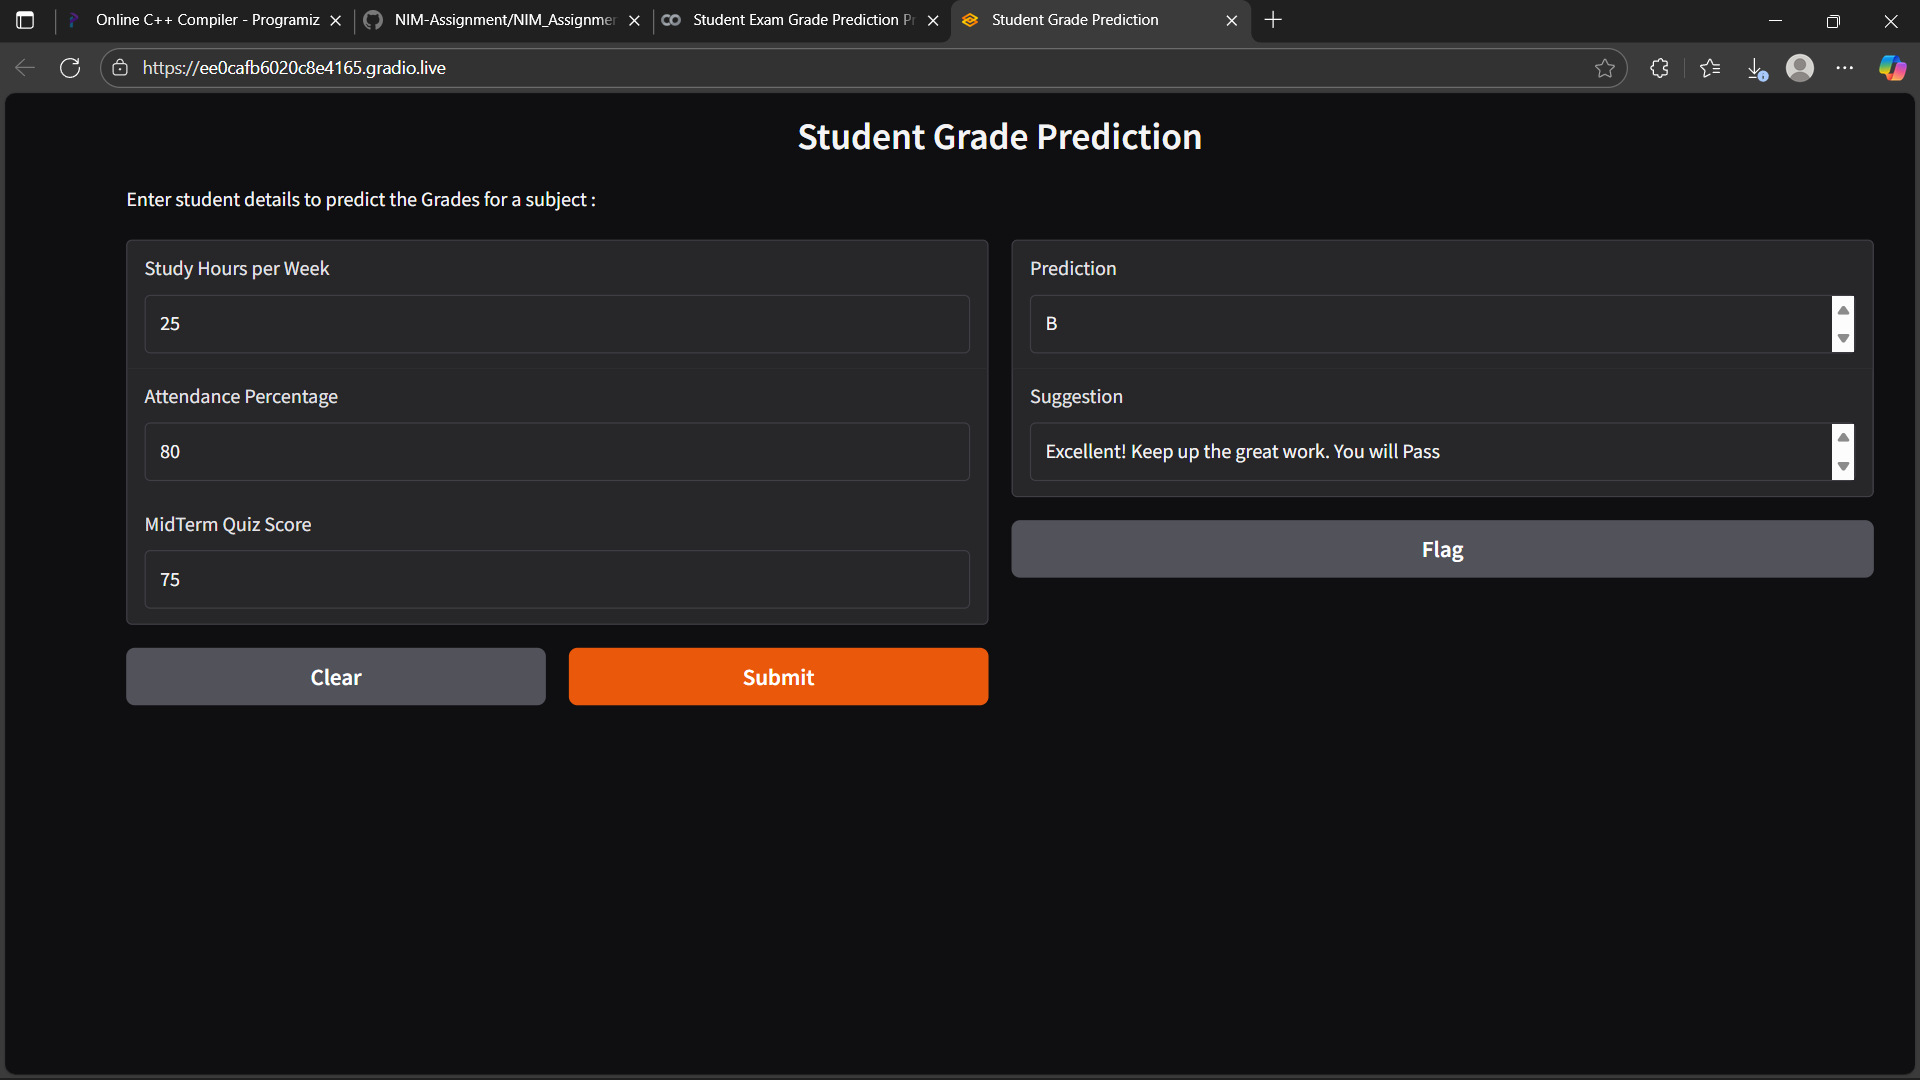

#Output:Fail(E)

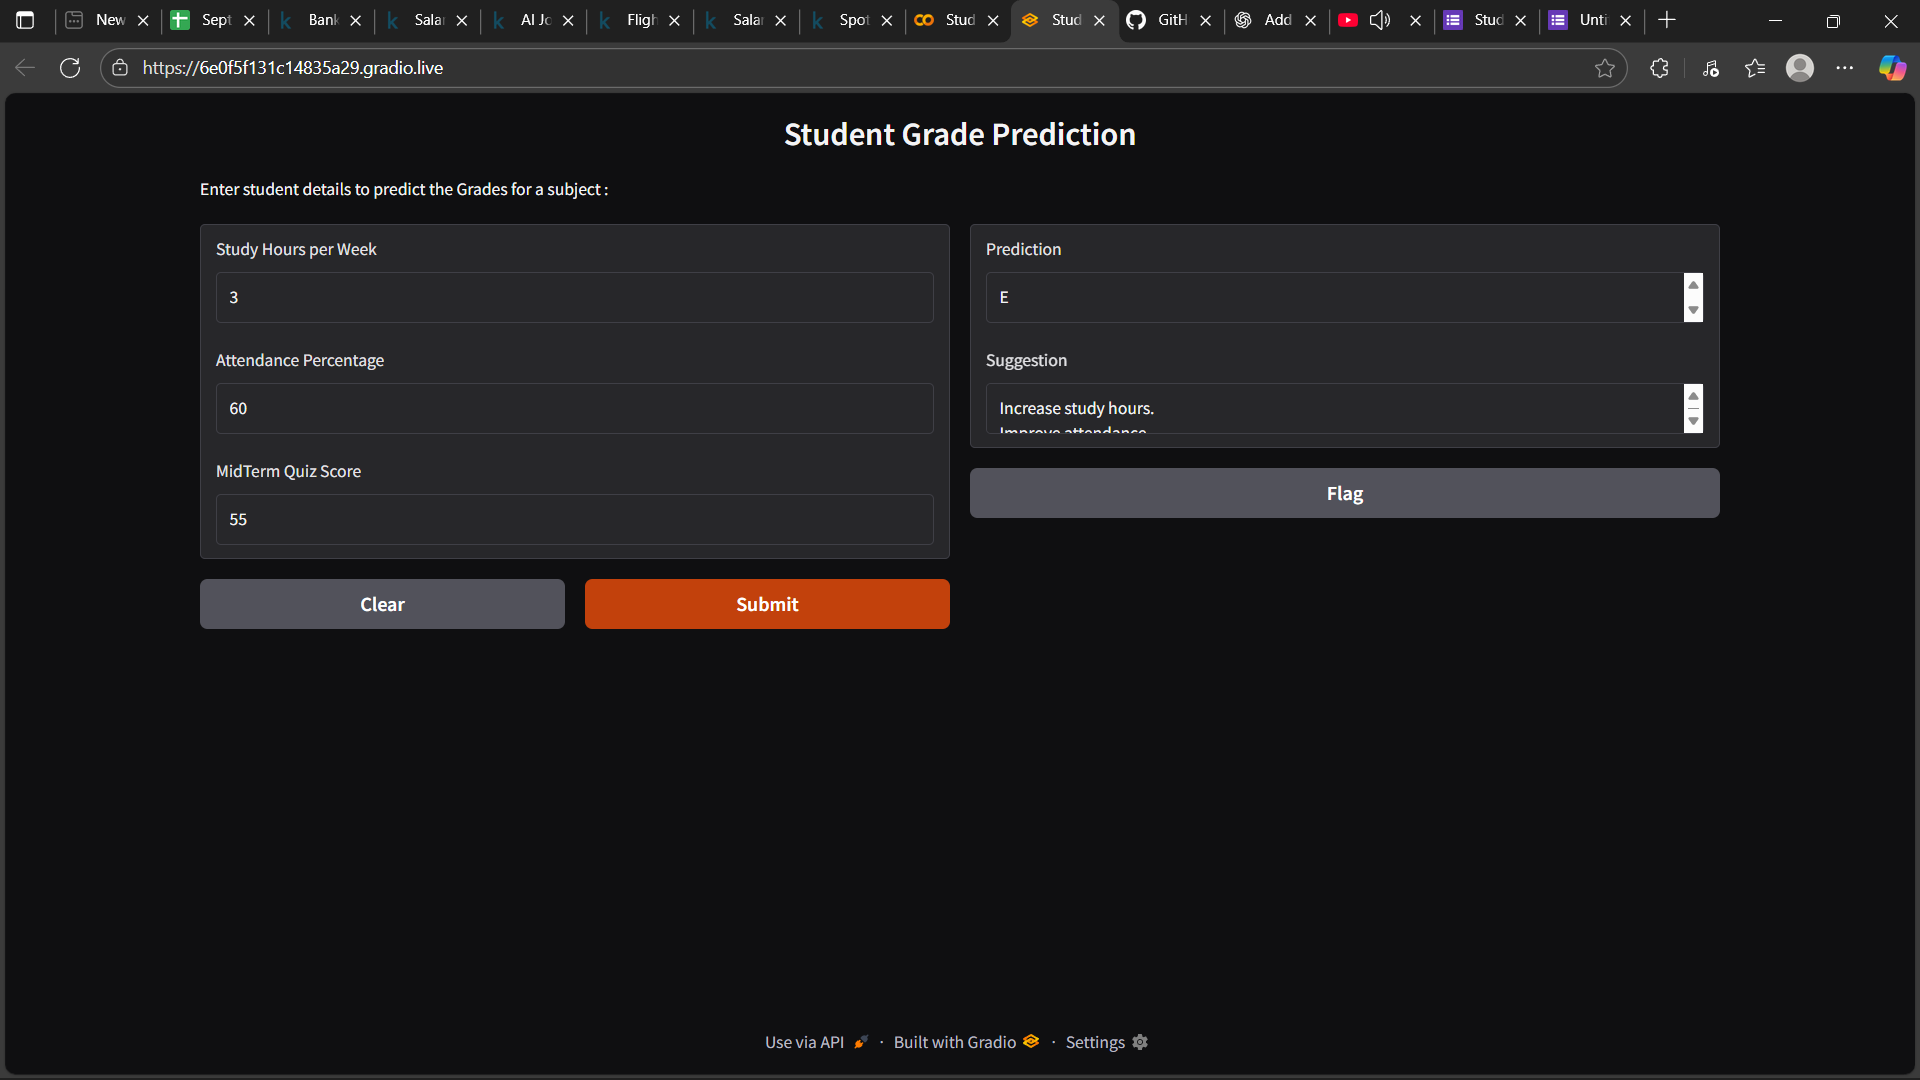